# Exercise 4


## Instructions


1. Collect **100-200 images** of the fruit
2. Split the collected images for train, test and validation. Please make sure that there are no duplicate images. Images that are used in train should not appear in test, validation and vice versa.
3. Combine the collected images together with the images of apple, orange and banana. They  are already available in the link below: https://github.com/robitussin/tensorflow_lite_projects/tree/main/images/fruits
4. Create and train a Convolutional Neural Network (CNN).
5. Save the model as **"model.tflite"**
6. Create a folder named **exercise_4** in your **CCDEPLRL_EXERCISES_COM222_ML** repository.
7. Upload the **python notebook (.ipynb)** and the **model (.tflite)** in the exercise_3 folder

Deadline of submission is on **April 22, 2025**

## Model

Import the libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

Hyperparameters: Set the image size and batch size

In [ ]:
img_height, img_width = 32, 32
batch_size = 20

Split the images into train, validation and test

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 540 files belonging to 4 classes.
Found 76 files belonging to 4 classes.
Found 140 files belonging to 4 classes.


Display sample images from the dataset

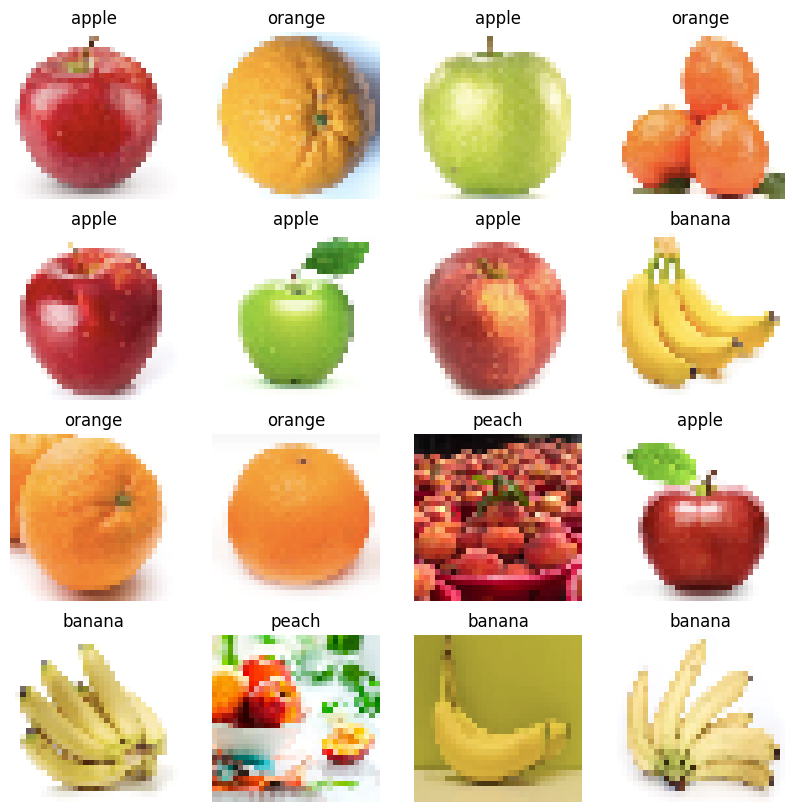

In [ ]:
class_names = ["apple", "banana", "orange", "peach"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Create the Convolutional Neural Network Model (CNN)

In [ ]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 4, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 4, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 4, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(4)
    ]
)

Define the optimizer and loss function

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

Train the model

In [ ]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 100
)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.4148 - loss: 1.3133 - val_accuracy: 0.5526 - val_loss: 1.0462
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.5811 - loss: 1.0077 - val_accuracy: 0.6711 - val_loss: 0.7229
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.7134 - loss: 0.7722 - val_accuracy: 0.7763 - val_loss: 0.5755
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.7738 - loss: 0.6097 - val_accuracy: 0.8421 - val_loss: 0.4771
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.8525 - loss: 0.4179 - val_accuracy: 0.8553 - val_loss: 0.4719
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.8656 - loss: 0.3884 - val_accuracy: 0.8553 - val_loss: 0.4756
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.8418 - loss: 0.3906 - val_accuracy: 0.8947 - val_loss: 0.3815
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.8969 - loss: 0.2744 - val_accuracy: 0

Test the model

In [ ]:
model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9831 - loss: 0.0772


[0.15194101631641388, 0.9714285731315613]

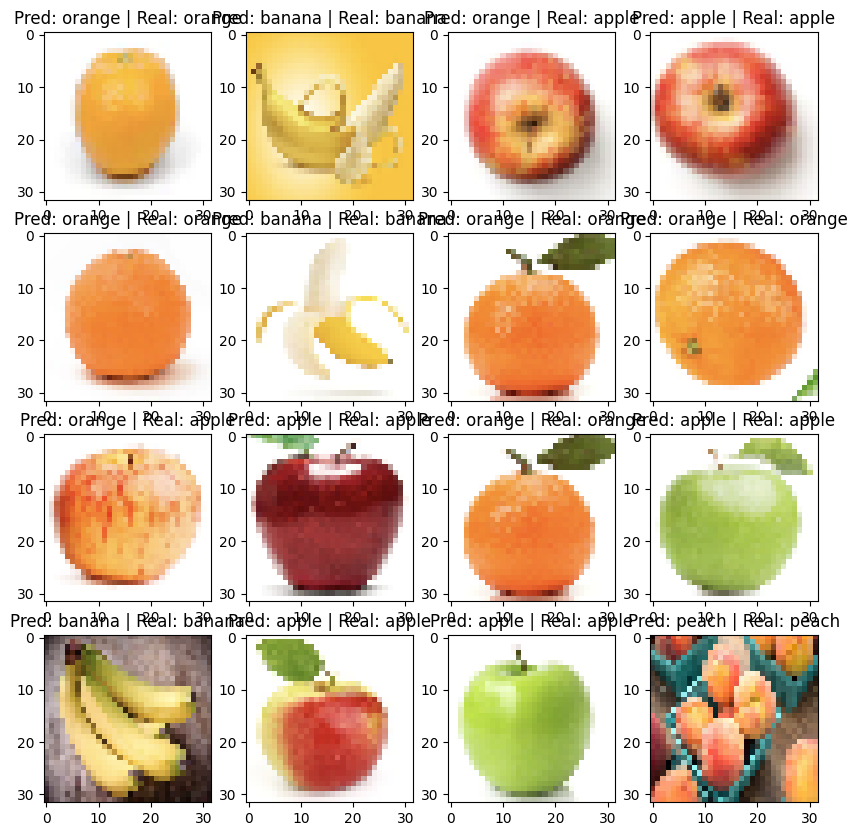

In [ ]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

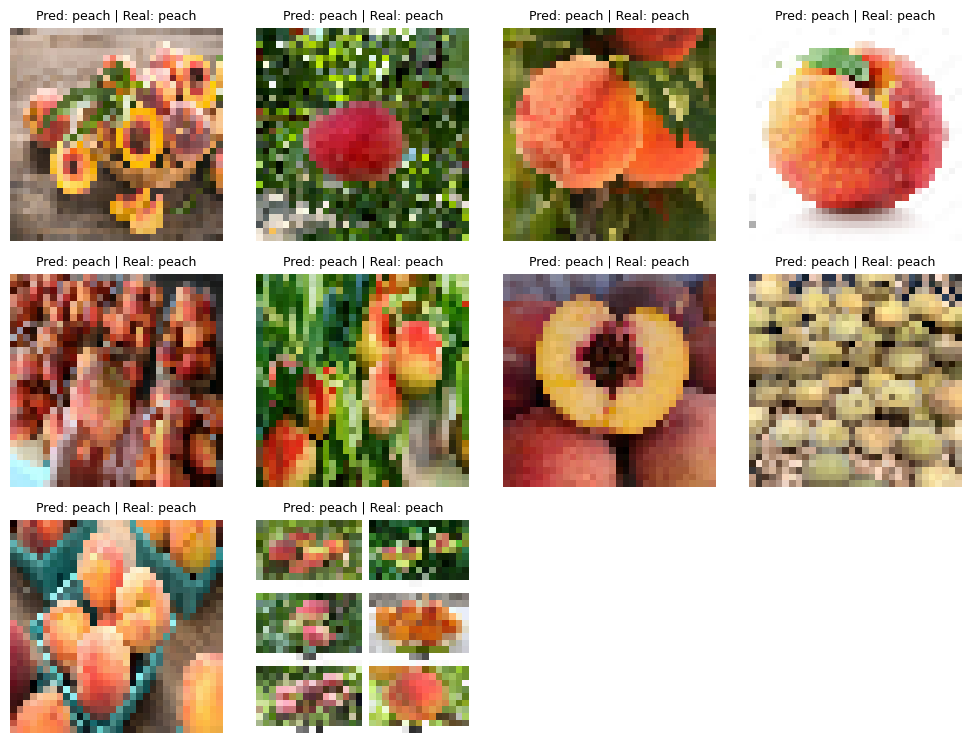

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

peach_images = []
peach_preds = []
peach_labels = []

for images, labels in test_ds:
    predictions = model(images)

    for i in range(len(images)):
        pred_index = np.argmax(predictions[i])
        label_index = labels[i].numpy()

        if class_names[pred_index] == "peach" or class_names[label_index] == "peach":
            peach_images.append(images[i])
            peach_preds.append(class_names[pred_index])
            peach_labels.append(class_names[label_index])

        if len(peach_images) >= 16:
            break
    if len(peach_images) >= 16:
        break

num_peach_images = len(peach_images)

plt.figure(figsize=(10, 10))
for i in range(num_peach_images):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(peach_images[i].numpy().astype("uint8"))
    plt.title(f"Pred: {peach_preds[i]} | Real: {peach_labels[i]}", fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()

Save the model

In [ ]:
model.save('fruits_model.keras')